### Importing necessary libraries

In [5]:
import os
from google.cloud import vision
from google.cloud.vision import enums
import matplotlib.pyplot as plt
import cv2

### Setting path to json key

In [6]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/home/affine/GCP/downloaded_key.json"

## 1) Detect text in a local image

To detect text in images:

- Initialising Service that performs Google Cloud Vision API detection tasks over client images i.e.ImageAnnotator   service here that returns detected entities from the images.

- Read image file from local/web url/GCS and perform Google Cloud Vision API tasks over it.

- take response from features like text_detection or document text detection depending on the image

In [104]:
# Detect text in a local image

def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.text_detection(image=image)
    print('response:\n ', response)
    
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

response:
  text_annotations {
  locale: "en"
  description: "RECYCLE\nPAPER\nAND\nSAVE\nTREES\n"
  bounding_poly {
    vertices {
      x: 25
      y: 58
    }
    vertices {
      x: 184
      y: 58
    }
    vertices {
      x: 184
      y: 230
    }
    vertices {
      x: 25
      y: 230
    }
  }
}
text_annotations {
  description: "RECYCLE"
  bounding_poly {
    vertices {
      x: 25
      y: 58
    }
    vertices {
      x: 184
      y: 58
    }
    vertices {
      x: 184
      y: 85
    }
    vertices {
      x: 25
      y: 85
    }
  }
}
text_annotations {
  description: "PAPER"
  bounding_poly {
    vertices {
      x: 49
      y: 100
    }
    vertices {
      x: 159
      y: 101
    }
    vertices {
      x: 159
      y: 127
    }
    vertices {
      x: 49
      y: 126
    }
  }
}
text_annotations {
  description: "AND"
  bounding_poly {
    vertices {
      x: 85
      y: 137
    }
    vertices {
      x: 122
      y: 137
    }
    vertices {
      x: 122
      y: 149


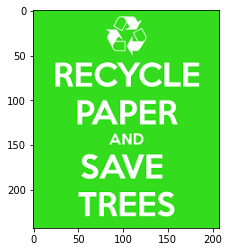

In [105]:
# printing image and calling above function

img=plt.imread('/home/affine/GCP/text2.png')
plt.imshow(img)
detect_text('/home/affine/GCP/text2.png')

Output:

Response output:

response consist of text annotations and full text annotation.

1) text annotations:

It consist of:

- locale (it is the language used)
- description (all text in the image)
- and bounding coordinates (of text)

the output will give:
first the text annotation of all text in the image
and then text annotations for individual words in the image


2) full text annotation:

It consist of:

- pages - gives width and height of the page
- blocks - gives bounding boxes of each blocks present in that page
- paragraphs - gives bounding boxes of each paragraphs present in the blocks
- words - gives bounding boxes of each words present in the paragraph
- symbols - gives bounding boxes of each symbols present in the words

As seen in the above example

##  2) Detect text in a remote image

In this image is stored in Google cloud storage and thus we pass uri of image in function to detect text

In [114]:
# Detect text in a remote image
def detect_text_uri(uri):
    """Detects text in the file located in Google Cloud Storage or on the Web.
    """
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    response = client.text_detection(image=image)
    print('response:\n ', response)
    
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

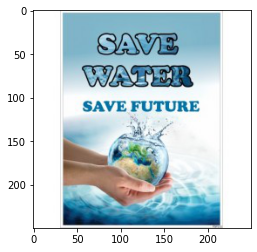

In [111]:
# Remote image used 
img=plt.imread('/home/affine/GCP/text4.jpg')
plt.imshow(img)

In [115]:
# calling function
detect_text_uri('gs://bucket0406/text4.jpg')

response:
  text_annotations {
  locale: "en"
  description: "SAVE\nWATER\nSAVE FUTURE\n"
  bounding_poly {
    vertices {
      x: 56
      y: 25
    }
    vertices {
      x: 190
      y: 25
    }
    vertices {
      x: 190
      y: 116
    }
    vertices {
      x: 56
      y: 116
    }
  }
}
text_annotations {
  description: "SAVE"
  bounding_poly {
    vertices {
      x: 74
      y: 25
    }
    vertices {
      x: 166
      y: 26
    }
    vertices {
      x: 166
      y: 53
    }
    vertices {
      x: 74
      y: 52
    }
  }
}
text_annotations {
  description: "WATER"
  bounding_poly {
    vertices {
      x: 56
      y: 63
    }
    vertices {
      x: 183
      y: 63
    }
    vertices {
      x: 183
      y: 88
    }
    vertices {
      x: 56
      y: 88
    }
  }
}
text_annotations {
  description: "SAVE"
  bounding_poly {
    vertices {
      x: 57
      y: 104
    }
    vertices {
      x: 106
      y: 104
    }
    vertices {
      x: 106
      y: 116
    }
    vert

## 3)To write output in GCS for remote images

In [20]:
# writing output in GCS
from google.cloud import vision_v1
from google.cloud.vision_v1 import enums


def sample_async_batch_annotate_images(
    input_image_uri="gs://bucket0406/text4.jpg",
    output_uri="gs://bucket0406/output_text4",
):
    client = vision_v1.ImageAnnotatorClient()

    source = {"image_uri": input_image_uri}
    image = {"source": source}
    features = [
        {"type": enums.Feature.Type.TEXT_DETECTION},
    ]

    requests = [{"image": image, "features": features}]
    gcs_destination = {"uri": output_uri}

    # The max number of responses to output in each JSON file
    batch_size = 2
    output_config = {"gcs_destination": gcs_destination,
                     "batch_size": batch_size}

    operation = client.async_batch_annotate_images(requests, output_config)

    print("Waiting for operation to complete...")
    response = operation.result(90)

    # The output is written to GCS with the provided output_uri as prefix
    gcs_output_uri = response.output_config.gcs_destination.uri
    print("Output written to GCS with prefix: {}".format(gcs_output_uri))

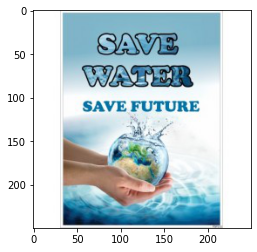

In [22]:
# Remote image used 
img=plt.imread('/home/affine/GCP/text4.jpg')
plt.imshow(img)

In [21]:
sample_async_batch_annotate_images()

Waiting for operation to complete...
Output written to GCS with prefix: gs://bucket0406/output_text4


In [32]:
# we can read above saved json file by downloading it and then running below code

import json 
  
# Opening JSON file 
f = open('output_text4output-1-to-1.json',) 
  
# returns JSON object asa dictionary 
data = json.load(f) 
  
# Closing file 
f.close() 

## 4) Detect text from web url

Now passing web url to detect text in image

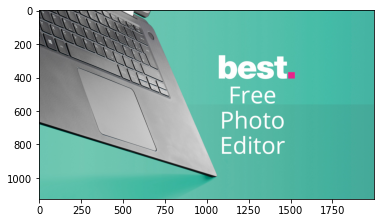

In [118]:
# web url image used 
img=plt.imread('/home/affine/GCP/text11.jpg')
plt.imshow(img)

In [117]:
detect_text_uri('https://cdn.mos.cms.futurecdn.net/C2iYbsuZTenwLGW6pr59UG.jpg')

response:
  text_annotations {
  locale: "en"
  description: "best.\nFree\nPhoto\nEditor\n"
  bounding_poly {
    vertices {
      x: 1092
      y: 252
    }
    vertices {
      x: 1527
      y: 252
    }
    vertices {
      x: 1527
      y: 857
    }
    vertices {
      x: 1092
      y: 857
    }
  }
}
text_annotations {
  description: "best."
  bounding_poly {
    vertices {
      x: 1111
      y: 252
    }
    vertices {
      x: 1527
      y: 254
    }
    vertices {
      x: 1526
      y: 417
    }
    vertices {
      x: 1110
      y: 415
    }
  }
}
text_annotations {
  description: "Free"
  bounding_poly {
    vertices {
      x: 1144
      y: 456
    }
    vertices {
      x: 1409
      y: 456
    }
    vertices {
      x: 1409
      y: 557
    }
    vertices {
      x: 1144
      y: 557
    }
  }
}
text_annotations {
  description: "Photo"
  bounding_poly {
    vertices {
      x: 1092
      y: 600
    }
    vertices {
      x: 1459
      y: 601
    }
    vertices {
      

## 5) Detect document text in a local image (detect hand-writing image)

For this we use document_text_detection feature that perform OCR on dense text images, such as documents (PDF/TIFF), and images with handwriting

In [119]:
# Detect document text in a local image

def detect_document(path):
    """Detects document features in an image."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.document_text_detection(image=image)
    print('response:\n ', response)

    for page in response.full_text_annotation.pages:
        for block in page.blocks:
            print('\nBlock confidence: {}\n'.format(block.confidence))

            for paragraph in block.paragraphs:
                print('Paragraph confidence: {}'.format(
                    paragraph.confidence))

                for word in paragraph.words:
                    word_text = ''.join([
                        symbol.text for symbol in word.symbols
                    ])
                    print('Word text: {} (confidence: {})'.format(
                        word_text, word.confidence))

                    for symbol in word.symbols:
                        print('\tSymbol: {} (confidence: {})'.format(
                            symbol.text, symbol.confidence))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

response:
  text_annotations {
  locale: "en"
  description: "MY\nHANDWRITTEN\nFONT!\n"
  bounding_poly {
    vertices {
      x: 24
      y: 22
    }
    vertices {
      x: 251
      y: 22
    }
    vertices {
      x: 251
      y: 153
    }
    vertices {
      x: 24
      y: 153
    }
  }
}
text_annotations {
  description: "MY"
  bounding_poly {
    vertices {
      x: 24
      y: 26
    }
    vertices {
      x: 67
      y: 22
    }
    vertices {
      x: 70
      y: 55
    }
    vertices {
      x: 27
      y: 59
    }
  }
}
text_annotations {
  description: "HANDWRITTEN"
  bounding_poly {
    vertices {
      x: 29
      y: 69
    }
    vertices {
      x: 247
      y: 46
    }
    vertices {
      x: 251
      y: 87
    }
    vertices {
      x: 33
      y: 110
    }
  }
}
text_annotations {
  description: "FONT"
  bounding_poly {
    vertices {
      x: 52
      y: 115
    }
    vertices {
      x: 106
      y: 111
    }
    vertices {
      x: 109
      y: 148
    }
    ver

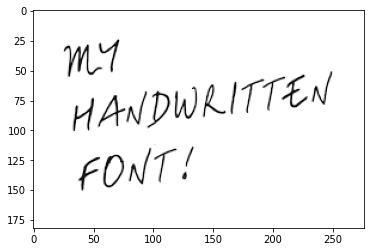

In [121]:
# plotting image used and calling above function
img=plt.imread('/home/affine/GCP/imageh2.png')
plt.imshow(img)
detect_document('/home/affine/GCP/imageh2.png')

## 6) Detect document text in a remote image (hand-written image)

Image is saved in GCS thus iamge uri is passed in function for that

In [129]:
# Detect document text in a remote image
def detect_document_uri(uri):
    """Detects document features in the file located in Google Cloud
    Storage."""
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    response = client.document_text_detection(image=image)
    print('response:\n ', response)
    
    for page in response.full_text_annotation.pages:
        for block in page.blocks:
            print('\nBlock confidence: {}\n'.format(block.confidence))

            for paragraph in block.paragraphs:
                print('Paragraph confidence: {}'.format(
                    paragraph.confidence))

                for word in paragraph.words:
                    word_text = ''.join([
                        symbol.text for symbol in word.symbols
                    ])
                    print('Word text: {} (confidence: {})'.format(
                        word_text, word.confidence))

                    for symbol in word.symbols:
                        print('\tSymbol: {} (confidence: {})'.format(
                            symbol.text, symbol.confidence))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

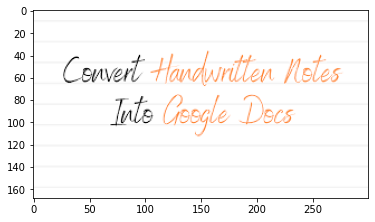

In [124]:
# Remote image used 
img=plt.imread('/home/affine/GCP/imageh3.png')
plt.imshow(img)

If above hand-written image is detected using Text_detector then it will not be detected correctly because TEXT_DETECTION is used for sparse text images as we can see below:

In [123]:
# if detected using text detector then handwritten images are not detected correctly
detect_text('/home/affine/GCP/imageh3.png')

response:
  text_annotations {
  locale: "en"
  description: "Convert Handwritten Metes\nInto Cesegle Decs\n"
  bounding_poly {
    vertices {
      x: 27
      y: 37
    }
    vertices {
      x: 274
      y: 37
    }
    vertices {
      x: 274
      y: 111
    }
    vertices {
      x: 27
      y: 111
    }
  }
}
text_annotations {
  description: "Convert"
  bounding_poly {
    vertices {
      x: 27
      y: 40
    }
    vertices {
      x: 99
      y: 40
    }
    vertices {
      x: 99
      y: 64
    }
    vertices {
      x: 27
      y: 64
    }
  }
}
text_annotations {
  description: "Handwritten"
  bounding_poly {
    vertices {
      x: 105
      y: 37
    }
    vertices {
      x: 215
      y: 37
    }
    vertices {
      x: 215
      y: 67
    }
    vertices {
      x: 105
      y: 67
    }
  }
}
text_annotations {
  description: "Metes"
  bounding_poly {
    vertices {
      x: 225
      y: 40
    }
    vertices {
      x: 274
      y: 40
    }
    vertices {
      x: 27

In the above example we can see that handwritten image 'Convert Handwritten Notes Into google docs' is detected as 'Convert Handwritten Metes Into Cesegle Decs"' by text_detector but when same image is detected using document text detector as below then it is detected correctly.

In [125]:
# same handwritten image is detected using document_text_detector
detect_document_uri('gs://bucket0406/imageh3.png')

response:
  text_annotations {
  locale: "en"
  description: "Convert Handwritten Notes\nInto Google Docs\n"
  bounding_poly {
    vertices {
      x: 29
      y: 34
    }
    vertices {
      x: 275
      y: 34
    }
    vertices {
      x: 275
      y: 114
    }
    vertices {
      x: 29
      y: 114
    }
  }
}
text_annotations {
  description: "Convert"
  bounding_poly {
    vertices {
      x: 29
      y: 34
    }
    vertices {
      x: 97
      y: 34
    }
    vertices {
      x: 97
      y: 68
    }
    vertices {
      x: 29
      y: 68
    }
  }
}
text_annotations {
  description: "Handwritten"
  bounding_poly {
    vertices {
      x: 110
      y: 34
    }
    vertices {
      x: 212
      y: 34
    }
    vertices {
      x: 212
      y: 68
    }
    vertices {
      x: 110
      y: 68
    }
  }
}
text_annotations {
  description: "Notes"
  bounding_poly {
    vertices {
      x: 224
      y: 34
    }
    vertices {
      x: 275
      y: 34
    }
    vertices {
      x: 275

## 7) Detect document text in web url (for hand-written image)

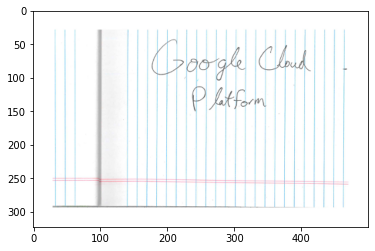

In [128]:
# web url image used 
img=plt.imread('/home/affine/GCP/text12.png')
plt.imshow(img)

In [127]:
detect_document_uri('https://cloud.google.com/vision/docs/images/detect_handwriting_OCR-detect-handwriting_SMALL.png')

response:
  text_annotations {
  locale: "en"
  description: "Google Cloud\nPlatform\n"
  bounding_poly {
    vertices {
      x: 226
      y: 33
    }
    vertices {
      x: 422
      y: 33
    }
    vertices {
      x: 422
      y: 151
    }
    vertices {
      x: 226
      y: 151
    }
  }
}
text_annotations {
  description: "Google"
  bounding_poly {
    vertices {
      x: 226
      y: 35
    }
    vertices {
      x: 316
      y: 34
    }
    vertices {
      x: 317
      y: 106
    }
    vertices {
      x: 227
      y: 107
    }
  }
}
text_annotations {
  description: "Cloud"
  bounding_poly {
    vertices {
      x: 348
      y: 34
    }
    vertices {
      x: 421
      y: 33
    }
    vertices {
      x: 422
      y: 104
    }
    vertices {
      x: 349
      y: 105
    }
  }
}
text_annotations {
  description: "Platform"
  bounding_poly {
    vertices {
      x: 249
      y: 111
    }
    vertices {
      x: 341
      y: 111
    }
    vertices {
      x: 341
      y: 151

## 8) Detect text in files (PDF)

- The Vision API supports online (synchronous) and offline (asynchronous) requests.

online requests:

- online (synchronous) requests - An online annotation request (images:annotate or files:annotate) immediately returns inline annotations to the user. Online annotation requests limit the amount of files you can annotate in a single request; you can only specify a single file and specify a small number of pages (<=5) in that file to be annotated.
- The Vision API now supports online (synchronous) small batch annotation (PDF/TIFF/GIF) for all features.


offline requests:

- offline (asynchronous) requests - An offline annotation request (images:asyncBatchAnnotate or files:asyncBatchAnnotate) starts a long-running operation (LRO) and does not immediately return a response to the caller. When the LRO completes, annotations are stored as files in a Cloud Storage bucket you specify. Offline annotation requests allow you to specify larger batches of files and can specify more pages (<=2000) per file for annotation at a single time than you are able to with online requests.

- Vision API supports offline asynchronous PDF/TIFF file annotation currently only for the DOCUMENT_TEXT_DETECTION feature type and for files stored in Cloud Storage buckets. Response JSON files are saved to a Cloud Storage bucket.

- Document text detection from PDF and TIFF must be requested using the files:asyncBatchAnnotate function, which performs an offline (asynchronous) request and provides its status using the operations resources.

### 8) a) Offline request

In this when whole operation gets completed then only annotations are stored in cloud storage

In [7]:
def async_detect_document(gcs_source_uri, gcs_destination_uri):
    """OCR with PDF/TIFF as source files on GCS"""
    import re
    from google.cloud import vision
    from google.cloud import storage
    from google.protobuf import json_format
    # Supported mime_types are: 'application/pdf' and 'image/tiff'
    mime_type = 'application/pdf'

    # How many pages should be grouped into each json output file.
    batch_size = 2

    client = vision.ImageAnnotatorClient()

    feature = vision.types.Feature(
        type=vision.enums.Feature.Type.DOCUMENT_TEXT_DETECTION)

    gcs_source = vision.types.GcsSource(uri=gcs_source_uri)
    input_config = vision.types.InputConfig(
        gcs_source=gcs_source, mime_type=mime_type)

    gcs_destination = vision.types.GcsDestination(uri=gcs_destination_uri)
    output_config = vision.types.OutputConfig(
        gcs_destination=gcs_destination, batch_size=batch_size)

    async_request = vision.types.AsyncAnnotateFileRequest(
        features=[feature], input_config=input_config,
        output_config=output_config)

    operation = client.async_batch_annotate_files(
        requests=[async_request])

    print('Waiting for the operation to finish.')
    operation.result(timeout=420)

    # Once the request has completed and the output has been
    # written to GCS, we can list all the output files.
    storage_client = storage.Client()

    match = re.match(r'gs://([^/]+)/(.+)', gcs_destination_uri)
    bucket_name = match.group(1)
    prefix = match.group(2)

    bucket = storage_client.get_bucket(bucket_name)

    # List objects with the given prefix.
    blob_list = list(bucket.list_blobs(prefix=prefix))
    print('Output files:')
    for blob in blob_list:
        print(blob.name)

    # Process the first output file from GCS.
    # Since we specified batch_size=2, the first response contains
    # the first two pages of the input file.
    output = blob_list[0]

    json_string = output.download_as_string()
    response = json_format.Parse(
        json_string, vision.types.AnnotateFileResponse())

    # The actual response for the first page of the input file.
    first_page_response = response.responses[0]
    annotation = first_page_response.full_text_annotation

    # Here we print the full text from the first page.
    # The response contains more information:
    # annotation/pages/blocks/paragraphs/words/symbols
    # including confidence scores and bounding boxes
    print(u'Full text:\n{}'.format(
        annotation.text))

In [10]:
# output
async_detect_document('gs://bucket0406/C4.pdf', 'gs://bucket0406/output_pdf/')

Waiting for the operation to finish.
Output files:
output_pdf/output-1-to-2.json
output_pdf/output-11-to-12.json
output_pdf/output-13-to-14.json
output_pdf/output-15-to-15.json
output_pdf/output-3-to-4.json
output_pdf/output-5-to-6.json
output_pdf/output-7-to-8.json
output_pdf/output-9-to-10.json
Full text:
9
Antenna Basics
Introduction Antennas are a very important component of communication systems. By definition, an antenna is a device used to transform an RF signal, traveling on a conductor, into an electromagnetic wave in free space. Antennas demonstrate a property known as reciprocity, which means that an antenna will maintain the same characteristics regardless if it is transmitting or receiving. Most antennas are resonant devices, which operate efficiently over a relatively narrow frequency band. An antenna must be tuned to the same frequency band of the radio system to which it is connected, otherwise the reception and the transmission will be impaired. When a signal is fed in

### 8) b) Online request

In online request we can see output inline

#### Using a locally stored file

In [14]:
# Using a locally stored file

import io

from google.cloud import vision_v1
from google.cloud.vision_v1 import enums


def sample_batch_annotate_files(file_path):
    """Perform batch file annotation."""
    client = vision_v1.ImageAnnotatorClient()

    # Supported mime_type: application/pdf, image/tiff, image/gif
    mime_type = "application/pdf"
    with io.open(file_path, "rb") as f:
        content = f.read()
    input_config = {"mime_type": mime_type, "content": content}
    features = [{"type": enums.Feature.Type.DOCUMENT_TEXT_DETECTION}]

    # The service can process up to 5 pages per document file. Here we specify
    # the first, second, and last page of the document to be processed.
    pages = [1, 2, -1]
    requests = [{"input_config": input_config, "features": features, "pages": pages}]

    response = client.batch_annotate_files(requests)
    for image_response in response.responses[0].responses:
        print(u"Full text: {}".format(image_response.full_text_annotation.text))
        for page in image_response.full_text_annotation.pages:
            for block in page.blocks:
                print(u"\nBlock confidence: {}".format(block.confidence))
                for par in block.paragraphs:
                    print(u"\tParagraph confidence: {}".format(par.confidence))
                    for word in par.words:
                        print(u"\t\tWord confidence: {}".format(word.confidence))
                        for symbol in word.symbols:
                            print(
                                u"\t\t\tSymbol: {}, (confidence: {})".format(
                                    symbol.text, symbol.confidence
                                )
                            )



In [15]:
sample_batch_annotate_files('C4.pdf')

Full text: 9
Antenna Basics
Introduction Antennas are a very important component of communication systems. By definition, an antenna is a device used to transform an RF signal, traveling on a conductor, into an electromagnetic wave in free space. Antennas demonstrate a property known as reciprocity, which means that an antenna will maintain the same characteristics regardless if it is transmitting or receiving. Most antennas are resonant devices, which operate efficiently over a relatively narrow frequency band. An antenna must be tuned to the same frequency band of the radio system to which it is connected, otherwise the reception and the transmission will be impaired. When a signal is fed into an antenna, the antenna will emit radiation distributed in space in a certain way. A graphical representation of the relative distribution of the radiated power in space is called a radiation pattern.
Antenna Glossary Before we talk about specific antennas, there are a few common terms that mus

#### Using a file on Cloud Storage

In [16]:
# Using a file on Cloud Storage

from google.cloud import vision_v1
from google.cloud.vision_v1 import enums


def sample_batch_annotate_files(
    storage_uri="gs://bucket0406/C4.pdf",):
    """Perform batch file annotation."""
    mime_type = "application/pdf"

    client = vision_v1.ImageAnnotatorClient()

    gcs_source = {"uri": storage_uri}
    input_config = {"gcs_source": gcs_source, "mime_type": mime_type}
    features = [{"type": enums.Feature.Type.DOCUMENT_TEXT_DETECTION}]

    # The service can process up to 5 pages per document file.
    # Here we specify the first, second, and last page of the document to be
    # processed.
    pages = [1, 2, -1]
    requests = [{"input_config": input_config, "features": features, "pages": pages}]

    response = client.batch_annotate_files(requests)
    for image_response in response.responses[0].responses:
        print(u"Full text: {}".format(image_response.full_text_annotation.text))
        for page in image_response.full_text_annotation.pages:
            for block in page.blocks:
                print(u"\nBlock confidence: {}".format(block.confidence))
                for par in block.paragraphs:
                    print(u"\tParagraph confidence: {}".format(par.confidence))
                    for word in par.words:
                        print(u"\t\tWord confidence: {}".format(word.confidence))
                        for symbol in word.symbols:
                            print(
                                u"\t\t\tSymbol: {}, (confidence: {})".format(
                                    symbol.text, symbol.confidence
                                )
                            )



In [17]:
sample_batch_annotate_files()

Full text: 9
Antenna Basics
Introduction Antennas are a very important component of communication systems. By definition, an antenna is a device used to transform an RF signal, traveling on a conductor, into an electromagnetic wave in free space. Antennas demonstrate a property known as reciprocity, which means that an antenna will maintain the same characteristics regardless if it is transmitting or receiving. Most antennas are resonant devices, which operate efficiently over a relatively narrow frequency band. An antenna must be tuned to the same frequency band of the radio system to which it is connected, otherwise the reception and the transmission will be impaired. When a signal is fed into an antenna, the antenna will emit radiation distributed in space in a certain way. A graphical representation of the relative distribution of the radiated power in space is called a radiation pattern.
Antenna Glossary Before we talk about specific antennas, there are a few common terms that mus

## 9) Batch image annotation for local images

In this we are passing multiple local images i.e.batch of images in one request for detection

In [48]:
from google.cloud import vision
from google.cloud.vision import enums
from google.cloud.vision import types
client = vision_v1.ImageAnnotatorClient()
features = [
    types.Feature(type=enums.Feature.Type.TEXT_DETECTION),
]

requests = []
for filename in ['text2.png', 'text11.jpg', 'text4.jpg']:
    with open(filename, 'rb') as image_file:
        image = types.Image(
            content = image_file.read())       
    request = types.AnnotateImageRequest(
        image=image, features=features)
    requests.append(request)

response = client.batch_annotate_images(requests)

for annotation_response in response.responses:
    print(annotation_response)

text_annotations {
  locale: "en"
  description: "RECYCLE\nPAPER\nAND\nSAVE\nTREES\n"
  bounding_poly {
    vertices {
      x: 25
      y: 58
    }
    vertices {
      x: 184
      y: 58
    }
    vertices {
      x: 184
      y: 230
    }
    vertices {
      x: 25
      y: 230
    }
  }
}
text_annotations {
  description: "RECYCLE"
  bounding_poly {
    vertices {
      x: 25
      y: 58
    }
    vertices {
      x: 184
      y: 58
    }
    vertices {
      x: 184
      y: 85
    }
    vertices {
      x: 25
      y: 85
    }
  }
}
text_annotations {
  description: "PAPER"
  bounding_poly {
    vertices {
      x: 49
      y: 100
    }
    vertices {
      x: 159
      y: 101
    }
    vertices {
      x: 159
      y: 127
    }
    vertices {
      x: 49
      y: 126
    }
  }
}
text_annotations {
  description: "AND"
  bounding_poly {
    vertices {
      x: 85
      y: 137
    }
    vertices {
      x: 122
      y: 137
    }
    vertices {
      x: 122
      y: 149
    }
    ve